In [1]:
import torch
import matplotlib.pyplot as plt
import os
import pickle


In [2]:
beta = 0.7
num_steps = 60
batch_size = 64
v_thr_train = 0.5
# Load data from the pickle file for sparsity vs threshold
with open(r'Experiment_DVS\Plots\Plot_data\FT_spars_thr_beta0.7_num_steps60_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    v_thrs = data['thresholds']
    L1_1_sparss = data['L1_1_sparss']
    L1_2_sparss = data['L1_2_sparss']
    L1_3_sparss = data['L1_3_sparss']
    L2_1_sparss = data['L2_1_sparss']
    L2_2_sparss = data['L2_2_sparss']
    L2_3_sparss = data['L2_3_sparss']
    L3_1_sparss = data['L3_1_sparss']
    L3_2_sparss = data['L3_2_sparss']
    L3_3_sparss = data['L3_3_sparss']
    L4_1_sparss = data['L4_1_sparss']
    L4_2_sparss = data['L4_2_sparss']
    L4_3_sparss = data['L4_3_sparss']

# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_DVS\Plots\Plot_data\FT_acc_vs_thr_beta0.7_num_steps60_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs = data['accs']
    accs2 = data['accs2']
    accs3 = data['accs3']
    briers = data['briers']
    briers2 = data['briers2']
    briers3 = data['briers3']
    print(data.keys())



dict_keys(['thresholds', 'accs', 'accs2', 'accs3', 'briers', 'briers2', 'briers3', 'briers_sm', 'briers2_sm', 'briers3_sm'])


In [3]:
model_1_meanspars = torch.mean(torch.tensor([L1_1_sparss, L2_1_sparss, L3_1_sparss, L4_1_sparss]), dim=0)
model_2_meanspars = torch.mean(torch.tensor([L1_2_sparss, L2_2_sparss, L3_2_sparss, L4_2_sparss]), dim=0)
model_3_meanspars = torch.mean(torch.tensor([L1_3_sparss, L2_3_sparss, L3_3_sparss, L4_3_sparss]), dim=0)

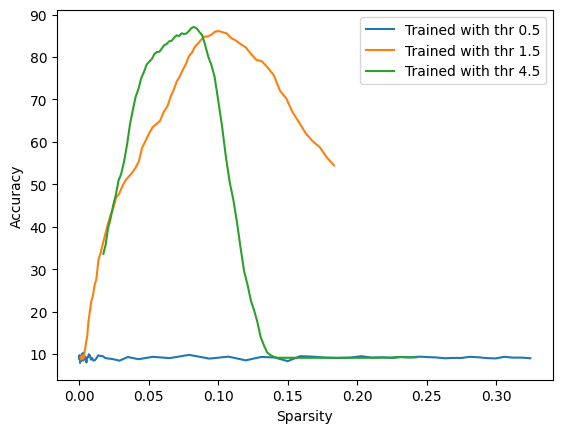

In [4]:
plt.plot(model_1_meanspars, accs, label='Trained with thr 0.5')
plt.plot(model_2_meanspars, accs2, label='Trained with thr 1.5')
plt.plot(model_3_meanspars, accs3, label='Trained with thr 4.5')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()



In [5]:
with open(r'Experiment_DVS\Plots\Plot_data\FT_prob_Robustness_beta0.7_num_steps60_trainedthr_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    print(data.keys())
    probs = data['probs']
    accs_robust_FT = data['accs']
    accs2_robust_FT = data['accs2']
    accs3_robust_FT = data['accs3']
    briers_robust_FT = data['briers']
    briers2_robust_FT = data['briers2']
    briers3_robust_FT = data['briers3']
    briers_sm_robust_FT = data['briers_sm']
    briers2_sm_robust_FT = data['briers2_sm']
    briers3_sm_robust_FT = data['briers3_sm']

with open(r'Experiment_DVS\Plots\Plot_data\ASSnet_prob_Robustness_beta0.7_num_steps60_trainedthr_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_robust_ASSnet = data['accs']
    accs2_robust_ASSnet = data['accs2']
    accs3_robust_ASSnet = data['accs3']
    briers_robust_ASSnet = data['briers']
    briers2_robust_ASSnet = data['briers2']
    briers3_robust_ASSnet = data['briers3']
    briers_sm_robust_ASSnet = data['briers_sm']
    briers2_sm_robust_ASSnet = data['briers2_sm']
    briers3_sm_robust_ASSnet = data['briers3_sm']

with open(r'Experiment_DVS\Plots\Plot_data\Det_prob_Robustness_beta0.7_num_steps60_trainedthr_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_robust_Det = data['accs']
    accs2_robust_Det = data['accs2']
    accs3_robust_Det = data['accs3']
    briers_robust_Det = data['briers']
    briers2_robust_Det = data['briers2']
    briers3_robust_Det = data['briers3']
    briers_sm_robust_Det = data['briers_sm']
    briers2_sm_robust_Det = data['briers2_sm']
    briers3_sm_robust_Det = data['briers3_sm']



dict_keys(['probs', 'accs', 'accs2', 'accs3', 'briers', 'briers2', 'briers3', 'briers_sm', 'briers2_sm', 'briers3_sm'])


In [6]:
print('Det Accuracies are:')
print(f'vthr = 0.5,: {accs_robust_Det[0]}, vthr = 1.5,: {accs2_robust_Det[0]}, vthr = 4.5,: {accs3_robust_Det[0]}')

print('FT accs are:')
print(f'vthr = 0.5,: {accs_robust_FT[0]}, vthr = 1.5,: {accs2_robust_FT[0]}, vthr = 4.5,: {accs3_robust_FT[0]}')

print('ASSnet accs are:')
print(f'vthr = 0.5,: {accs_robust_ASSnet[0]}, vthr = 1.5,: {accs2_robust_ASSnet[0]}, vthr = 4.5,: {accs3_robust_ASSnet[0]}')

Det Accuracies are:
vthr = 0.5,: 86.36363636363636, vthr = 1.5,: 87.87878787878788, vthr = 4.5,: 9.090909090909092
FT accs are:
vthr = 0.5,: 9.090909090909092, vthr = 1.5,: 82.8409090909091, vthr = 4.5,: 86.96969696969697
ASSnet accs are:
vthr = 0.5,: 83.10606060606061, vthr = 1.5,: 81.28787878787878, vthr = 4.5,: 78.93939393939394


Text(0.5, 1.0, 'Accuracy vs Probability for models trained with thr 0.5')

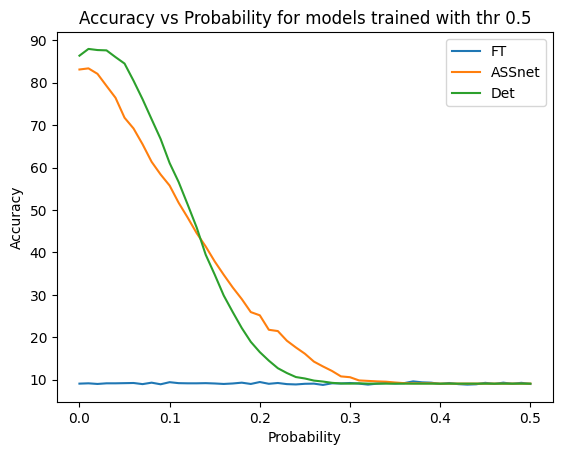

In [7]:
plt.figure()
plt.plot(probs, accs_robust_FT, label='FT')
plt.plot(probs, accs_robust_ASSnet, label='ASSnet')
plt.plot(probs, accs_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Probability for models trained with thr 0.5')
    

Text(0.5, 1.0, 'Accuracy vs Probability for models trained with thr 1.5')

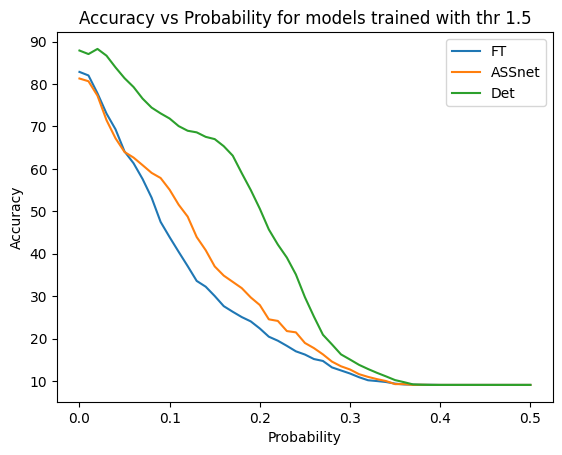

In [8]:
plt.figure()
plt.plot(probs, accs2_robust_FT, label='FT')
plt.plot(probs, accs2_robust_ASSnet, label='ASSnet')
plt.plot(probs, accs2_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Probability for models trained with thr 1.5')

Text(0.5, 1.0, 'Accuracy vs Probability for models trained with thr 4.5')

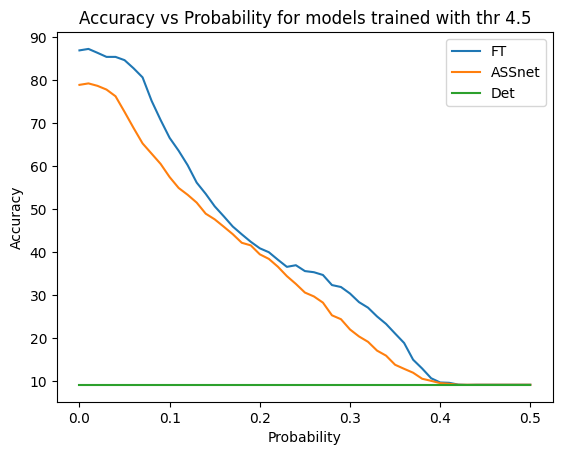

In [9]:
plt.figure()
plt.plot(probs, accs3_robust_FT, label='FT')
plt.plot(probs, accs3_robust_ASSnet, label='ASSnet')
plt.plot(probs, accs3_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Probability for models trained with thr 4.5')

In [10]:
print(f'For Det model')
print(f'Thresh 0.5 prob {probs[0]} accuracy is {accs_robust_Det[0]}')
print(f'Thresh 0.5 prob {probs[10]} accuracy is {accs_robust_Det[10]}')
print(f'Thresh 0.5 prob {probs[20]} accuracy is {accs_robust_Det[20]}')
print(f'Thresh 0.5 prob {probs[30]} accuracy is {accs_robust_Det[30]}')
print(f'Thresh 0.5 prob {probs[40]} accuracy is {accs_robust_Det[40]}')
print(f'Thresh 0.5 prob {probs[50]} accuracy is {accs_robust_Det[50]}')
print(f'For FT model')
print(f'Thresh 0.5 prob {probs[0]} accuracy is {accs_robust_FT[0]}')
print(f'Thresh 0.5 prob {probs[10]} accuracy is {accs_robust_FT[10]}')
print(f'Thresh 0.5 prob {probs[20]} accuracy is {accs_robust_FT[20]}')
print(f'Thresh 0.5 prob {probs[30]} accuracy is {accs_robust_FT[30]}')
print(f'Thresh 0.5 prob {probs[40]} accuracy is {accs_robust_FT[40]}')
print(f'Thresh 0.5 prob {probs[50]} accuracy is {accs_robust_FT[50]}')

print(f'For ASSnet model')
print(f'Thresh 0.5 prob {probs[0]} accuracy is {accs_robust_ASSnet[0]}')
print(f'Thresh 0.5 prob {probs[10]} accuracy is {accs_robust_ASSnet[10]}')
print(f'Thresh 0.5 prob {probs[20]} accuracy is {accs_robust_ASSnet[20]}')
print(f'Thresh 0.5 prob {probs[30]} accuracy is {accs_robust_ASSnet[30]}')
print(f'Thresh 0.5 prob {probs[40]} accuracy is {accs_robust_ASSnet[40]}')
print(f'Thresh 0.5 prob {probs[50]} accuracy is {accs_robust_ASSnet[50]}')


For Det model
Thresh 0.5 prob 0.0 accuracy is 86.36363636363636
Thresh 0.5 prob 0.1 accuracy is 61.06060606060606
Thresh 0.5 prob 0.2 accuracy is 16.515151515151516
Thresh 0.5 prob 0.3 accuracy is 9.090909090909092
Thresh 0.5 prob 0.4 accuracy is 9.090909090909092
Thresh 0.5 prob 0.5 accuracy is 9.090909090909092
For FT model
Thresh 0.5 prob 0.0 accuracy is 9.090909090909092
Thresh 0.5 prob 0.1 accuracy is 9.431818181818182
Thresh 0.5 prob 0.2 accuracy is 9.469696969696969
Thresh 0.5 prob 0.3 accuracy is 9.242424242424242
Thresh 0.5 prob 0.4 accuracy is 9.015151515151516
Thresh 0.5 prob 0.5 accuracy is 9.015151515151516
For ASSnet model
Thresh 0.5 prob 0.0 accuracy is 83.10606060606061
Thresh 0.5 prob 0.1 accuracy is 55.75757575757576
Thresh 0.5 prob 0.2 accuracy is 25.189393939393938
Thresh 0.5 prob 0.3 accuracy is 10.606060606060606
Thresh 0.5 prob 0.4 accuracy is 9.090909090909092
Thresh 0.5 prob 0.5 accuracy is 9.090909090909092


In [11]:
print(f'For Det model')
print(f'Thresh 1.5 prob {probs[0]} accuracy is {accs2_robust_Det[0]}')
print(f'Thresh 1.5 prob {probs[10]} accuracy is {accs2_robust_Det[10]}')
print(f'Thresh 1.5 prob {probs[20]} accuracy is {accs2_robust_Det[20]}')
print(f'Thresh 1.5 prob {probs[30]} accuracy is {accs2_robust_Det[30]}')
print(f'Thresh 1.5 prob {probs[40]} accuracy is {accs2_robust_Det[40]}')
print(f'Thresh 1.5 prob {probs[50]} accuracy is {accs2_robust_Det[50]}')
print(f'For FT model')
print(f'Thresh 1.5 prob {probs[0]} accuracy is {accs2_robust_FT[0]}')
print(f'Thresh 1.5 prob {probs[10]} accuracy is {accs2_robust_FT[10]}')
print(f'Thresh 1.5 prob {probs[20]} accuracy is {accs2_robust_FT[20]}')
print(f'Thresh 1.5 prob {probs[30]} accuracy is {accs2_robust_FT[30]}')
print(f'Thresh 1.5 prob {probs[40]} accuracy is {accs2_robust_FT[40]}')
print(f'Thresh 1.5 prob {probs[50]} accuracy is {accs2_robust_FT[50]}')

print(f'For ASSnet model')
print(f'Thresh 1.5 prob {probs[0]} accuracy is {accs2_robust_ASSnet[0]}')
print(f'Thresh 1.5 prob {probs[10]} accuracy is {accs2_robust_ASSnet[10]}')
print(f'Thresh 1.5 prob {probs[20]} accuracy is {accs2_robust_ASSnet[20]}')
print(f'Thresh 1.5 prob {probs[30]} accuracy is {accs2_robust_ASSnet[30]}')
print(f'Thresh 1.5 prob {probs[40]} accuracy is {accs2_robust_ASSnet[40]}')
print(f'Thresh 1.5 prob {probs[50]} accuracy is {accs2_robust_ASSnet[50]}')


For Det model
Thresh 1.5 prob 0.0 accuracy is 87.87878787878788
Thresh 1.5 prob 0.1 accuracy is 71.85606060606061
Thresh 1.5 prob 0.2 accuracy is 50.60606060606061
Thresh 1.5 prob 0.3 accuracy is 15.075757575757576
Thresh 1.5 prob 0.4 accuracy is 9.090909090909092
Thresh 1.5 prob 0.5 accuracy is 9.090909090909092
For FT model
Thresh 1.5 prob 0.0 accuracy is 82.8409090909091
Thresh 1.5 prob 0.1 accuracy is 43.90151515151515
Thresh 1.5 prob 0.2 accuracy is 22.386363636363637
Thresh 1.5 prob 0.3 accuracy is 11.780303030303031
Thresh 1.5 prob 0.4 accuracy is 9.090909090909092
Thresh 1.5 prob 0.5 accuracy is 9.090909090909092
For ASSnet model
Thresh 1.5 prob 0.0 accuracy is 81.28787878787878
Thresh 1.5 prob 0.1 accuracy is 55.07575757575758
Thresh 1.5 prob 0.2 accuracy is 27.916666666666668
Thresh 1.5 prob 0.3 accuracy is 12.727272727272727
Thresh 1.5 prob 0.4 accuracy is 9.090909090909092
Thresh 1.5 prob 0.5 accuracy is 9.090909090909092


In [12]:
print(f'For Det model')
print(f'Thresh 4.5 prob {probs[0]} accuracy is {accs3_robust_Det[0]}')
print(f'Thresh 4.5 prob {probs[10]} accuracy is {accs3_robust_Det[10]}')
print(f'Thresh 4.5 prob {probs[20]} accuracy is {accs3_robust_Det[20]}')
print(f'Thresh 4.5 prob {probs[30]} accuracy is {accs3_robust_Det[30]}')
print(f'Thresh 4.5 prob {probs[40]} accuracy is {accs3_robust_Det[40]}')
print(f'Thresh 4.5 prob {probs[50]} accuracy is {accs3_robust_Det[50]}')
print(f'For FT model')
print(f'Thresh 4.5 prob {probs[0]} accuracy is {accs3_robust_FT[0]}')
print(f'Thresh 4.5 prob {probs[10]} accuracy is {accs3_robust_FT[10]}')
print(f'Thresh 4.5 prob {probs[20]} accuracy is {accs3_robust_FT[20]}')
print(f'Thresh 4.5 prob {probs[30]} accuracy is {accs3_robust_FT[30]}')
print(f'Thresh 4.5 prob {probs[40]} accuracy is {accs3_robust_FT[40]}')
print(f'Thresh 4.5 prob {probs[50]} accuracy is {accs3_robust_FT[50]}')

print(f'For ASSnet model')
print(f'Thresh 4.5 prob {probs[0]} accuracy is {accs3_robust_ASSnet[0]}')
print(f'Thresh 4.5 prob {probs[10]} accuracy is {accs3_robust_ASSnet[10]}')
print(f'Thresh 4.5 prob {probs[20]} accuracy is {accs3_robust_ASSnet[20]}')
print(f'Thresh 4.5 prob {probs[30]} accuracy is {accs3_robust_ASSnet[30]}')
print(f'Thresh 4.5 prob {probs[40]} accuracy is {accs3_robust_ASSnet[40]}')
print(f'Thresh 4.5 prob {probs[50]} accuracy is {accs3_robust_ASSnet[50]}')


For Det model
Thresh 4.5 prob 0.0 accuracy is 9.090909090909092
Thresh 4.5 prob 0.1 accuracy is 9.090909090909092
Thresh 4.5 prob 0.2 accuracy is 9.090909090909092
Thresh 4.5 prob 0.3 accuracy is 9.090909090909092
Thresh 4.5 prob 0.4 accuracy is 9.090909090909092
Thresh 4.5 prob 0.5 accuracy is 9.090909090909092
For FT model
Thresh 4.5 prob 0.0 accuracy is 86.96969696969697
Thresh 4.5 prob 0.1 accuracy is 66.5909090909091
Thresh 4.5 prob 0.2 accuracy is 40.871212121212125
Thresh 4.5 prob 0.3 accuracy is 30.34090909090909
Thresh 4.5 prob 0.4 accuracy is 9.621212121212121
Thresh 4.5 prob 0.5 accuracy is 9.090909090909092
For ASSnet model
Thresh 4.5 prob 0.0 accuracy is 78.93939393939394
Thresh 4.5 prob 0.1 accuracy is 57.46212121212121
Thresh 4.5 prob 0.2 accuracy is 39.46969696969697
Thresh 4.5 prob 0.3 accuracy is 21.96969696969697
Thresh 4.5 prob 0.4 accuracy is 9.469696969696969
Thresh 4.5 prob 0.5 accuracy is 9.090909090909092


Text(0.5, 1.0, 'Brier Score vs Probability for models trained with thr 0.5')

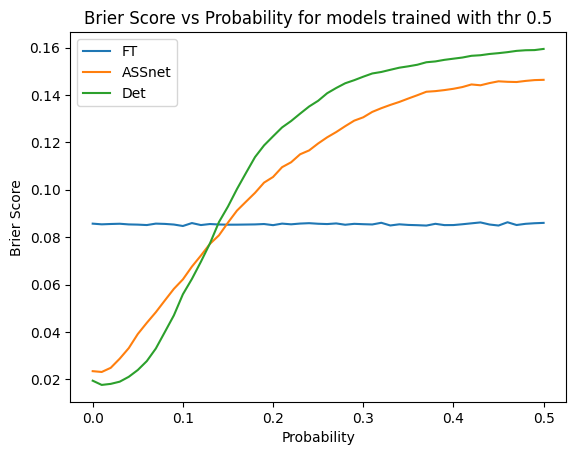

In [13]:
plt.figure()
plt.plot(probs, briers_robust_FT, label='FT')
plt.plot(probs, briers_robust_ASSnet, label='ASSnet')
plt.plot(probs, briers_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Brier Score')
plt.legend()
plt.title('Brier Score vs Probability for models trained with thr 0.5')
    

Text(0.5, 1.0, 'Brier Score vs Probability for models trained with thr 1.5')

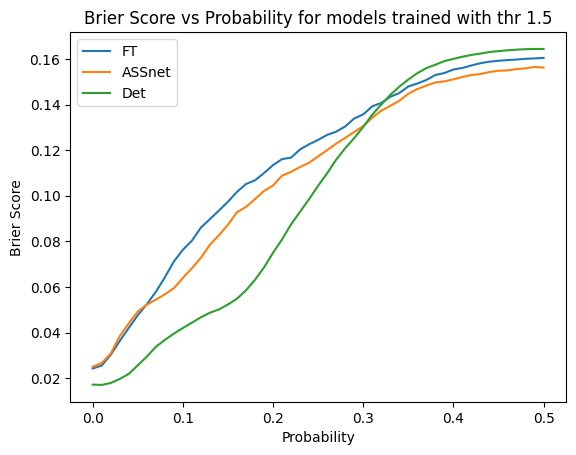

In [14]:
plt.figure()
plt.plot(probs, briers2_robust_FT, label='FT')
plt.plot(probs, briers2_robust_ASSnet, label='ASSnet')
plt.plot(probs, briers2_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Brier Score')
plt.legend()
plt.title('Brier Score vs Probability for models trained with thr 1.5')
    

Text(0.5, 1.0, 'Brier Score vs Probability for models trained with thr 4.5')

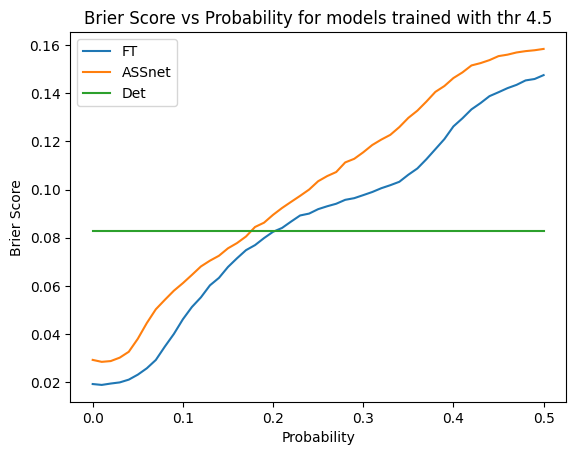

In [15]:
plt.figure()
plt.plot(probs, briers3_robust_FT, label='FT')
plt.plot(probs, briers3_robust_ASSnet, label='ASSnet')
plt.plot(probs, briers3_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Brier Score')
plt.legend()
plt.title('Brier Score vs Probability for models trained with thr 4.5')
    

Text(0.5, 1.0, 'Brier Score vs Probability for models trained with thr 4.5')

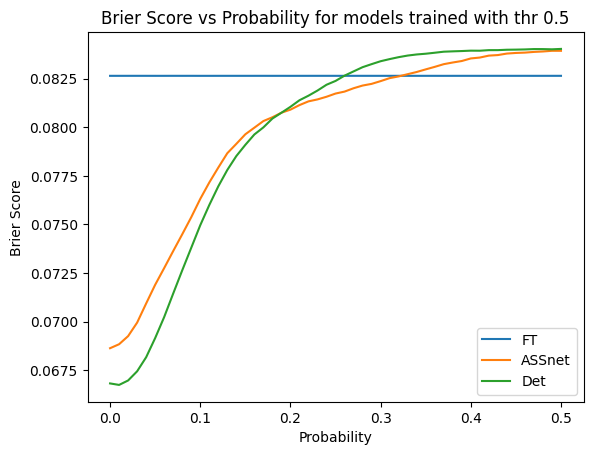

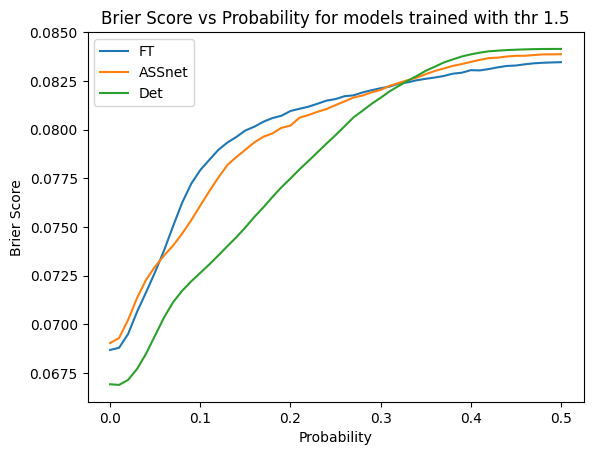

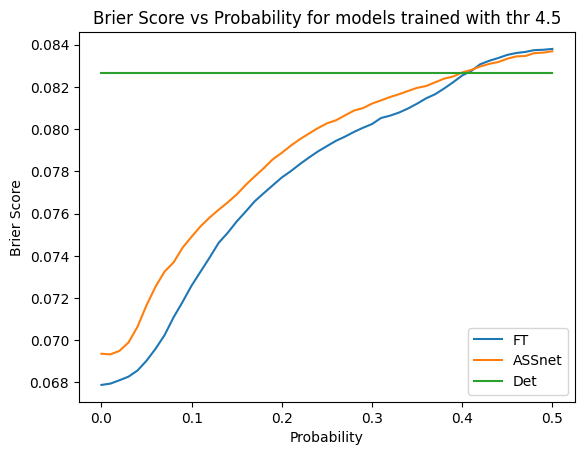

In [16]:
plt.figure()
plt.plot(probs, briers_sm_robust_FT, label='FT')
plt.plot(probs, briers_sm_robust_ASSnet, label='ASSnet')
plt.plot(probs, briers_sm_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Brier Score')
plt.legend()
plt.title('Brier Score vs Probability for models trained with thr 0.5')
    
plt.figure()
plt.plot(probs, briers2_sm_robust_FT, label='FT')
plt.plot(probs, briers2_sm_robust_ASSnet, label='ASSnet')
plt.plot(probs, briers2_sm_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Brier Score')
plt.legend()
plt.title('Brier Score vs Probability for models trained with thr 1.5')
    
plt.figure()
plt.plot(probs, briers3_sm_robust_FT, label='FT')
plt.plot(probs, briers3_sm_robust_ASSnet, label='ASSnet')
plt.plot(probs, briers3_sm_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Brier Score')
plt.legend()
plt.title('Brier Score vs Probability for models trained with thr 4.5')
    

In [17]:
with open(r'Experiment_DVS\Plots\Plot_data\FT_spars_thr_beta0.7_num_steps60_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    v_thrs = data['thresholds']
    L1_1_sparss_FT = data['L1_1_sparss']
    L1_2_sparss_FT = data['L1_2_sparss']
    L1_3_sparss_FT = data['L1_3_sparss']
    L2_1_sparss_FT = data['L2_1_sparss']
    L2_2_sparss_FT = data['L2_2_sparss']
    L2_3_sparss_FT = data['L2_3_sparss']
    L3_1_sparss_FT = data['L3_1_sparss']
    L3_2_sparss_FT = data['L3_2_sparss']
    L3_3_sparss_FT = data['L3_3_sparss']
    L4_1_sparss_FT = data['L4_1_sparss']
    L4_2_sparss_FT = data['L4_2_sparss']
    L4_3_sparss_FT = data['L4_3_sparss']

model_1_meanspars_FT = torch.mean(torch.tensor([L1_1_sparss_FT, L2_1_sparss_FT, L3_1_sparss_FT, L4_1_sparss_FT]), dim=0)
model_2_meanspars_FT = torch.mean(torch.tensor([L1_2_sparss_FT, L2_2_sparss_FT, L3_2_sparss_FT, L4_2_sparss_FT]), dim=0)
model_3_meanspars_FT = torch.mean(torch.tensor([L1_3_sparss_FT, L2_3_sparss_FT, L3_3_sparss_FT, L4_3_sparss_FT]), dim=0)



In [18]:
with open(r'Experiment_DVS\Plots\Plot_data\ASSnet_spars_thr_beta0.7_num_steps60_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    v_thrs = data['thresholds']
    L1_1_sparss_ASSnet = data['L1_1_sparss']
    L1_2_sparss_ASSnet = data['L1_2_sparss']
    L1_3_sparss_ASSnet = data['L1_3_sparss']
    L2_1_sparss_ASSnet = data['L2_1_sparss']
    L2_2_sparss_ASSnet = data['L2_2_sparss']
    L2_3_sparss_ASSnet = data['L2_3_sparss']
    L3_1_sparss_ASSnet = data['L3_1_sparss']
    L3_2_sparss_ASSnet = data['L3_2_sparss']
    L3_3_sparss_ASSnet = data['L3_3_sparss']
    L4_1_sparss_ASSnet = data['L4_1_sparss']
    L4_2_sparss_ASSnet = data['L4_2_sparss']
    L4_3_sparss_ASSnet = data['L4_3_sparss']


model_1_meanspars_ASSnet = torch.mean(torch.tensor([L1_1_sparss_ASSnet, L2_1_sparss_ASSnet, L3_1_sparss_ASSnet, L4_1_sparss_ASSnet]), dim=0)
model_2_meanspars_ASSnet = torch.mean(torch.tensor([L1_2_sparss_ASSnet, L2_2_sparss_ASSnet, L3_2_sparss_ASSnet, L4_2_sparss_ASSnet]), dim=0)
model_3_meanspars_ASSnet = torch.mean(torch.tensor([L1_3_sparss_ASSnet, L2_3_sparss_ASSnet, L3_3_sparss_ASSnet, L4_3_sparss_ASSnet]), dim=0)


In [19]:
with open(r'Experiment_DVS\Plots\Plot_data\Det_spars_thr_beta0.7_num_steps60_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    v_thrs = data['thresholds']
    L1_1_sparss_Det = data['L1_1_sparss']
    L1_2_sparss_Det = data['L1_2_sparss']
    L1_3_sparss_Det = data['L1_3_sparss']
    L2_1_sparss_Det = data['L2_1_sparss']
    L2_2_sparss_Det = data['L2_2_sparss']
    L2_3_sparss_Det = data['L2_3_sparss']
    L3_1_sparss_Det = data['L3_1_sparss']
    L3_2_sparss_Det = data['L3_2_sparss']
    L3_3_sparss_Det = data['L3_3_sparss']
    L4_1_sparss_Det = data['L4_1_sparss']
    L4_2_sparss_Det = data['L4_2_sparss']
    L4_3_sparss_Det = data['L4_3_sparss']


model_1_meanspars_Det = torch.mean(torch.tensor([L1_1_sparss_Det, L2_1_sparss_Det, L3_1_sparss_Det, L4_1_sparss_Det]), dim=0)
model_2_meanspars_Det = torch.mean(torch.tensor([L1_2_sparss_Det, L2_2_sparss_Det, L3_2_sparss_Det, L4_2_sparss_Det]), dim=0)
model_3_meanspars_Det = torch.mean(torch.tensor([L1_3_sparss_Det, L2_3_sparss_Det, L3_3_sparss_Det, L4_3_sparss_Det]), dim=0)

In [20]:
print(f'Sparsity for threshold {v_thrs[5]} is {model_1_meanspars_ASSnet[5]}')
print(f'Sparsity for threshold {v_thrs[15]} is {model_2_meanspars_ASSnet[15]}')
print(f'Sparsity for threshold {v_thrs[45]} is {model_3_meanspars_ASSnet[54]}')

Sparsity for threshold 0.5 is 0.1762537658214569
Sparsity for threshold 1.5 is 0.14832238852977753
Sparsity for threshold 4.5 is 0.09719045460224152


In [21]:
print(f'Sparsity for threshold {v_thrs[5]} is {model_1_meanspars_FT[5]}')
print(f'Sparsity for threshold {v_thrs[15]} is {model_2_meanspars_FT[15]}')
print(f'Sparsity for threshold {v_thrs[45]} is {model_3_meanspars_FT[54]}')

Sparsity for threshold 0.5 is 0.2933100461959839
Sparsity for threshold 1.5 is 0.1161978542804718
Sparsity for threshold 4.5 is 0.06659860908985138


In [22]:
print(f'Sparsity for threshold {v_thrs[5]} is {model_1_meanspars_Det[5]}')
print(f'Sparsity for threshold {v_thrs[15]} is {model_2_meanspars_Det[15]}')
print(f'Sparsity for threshold {v_thrs[45]} is {model_3_meanspars_Det[54]}')

Sparsity for threshold 0.5 is 0.07105302065610886
Sparsity for threshold 1.5 is 0.1419176459312439
Sparsity for threshold 4.5 is 0.0


Text(0.5, 1.0, 'Sparsity vs Threshold for models trained with thr 0.5')

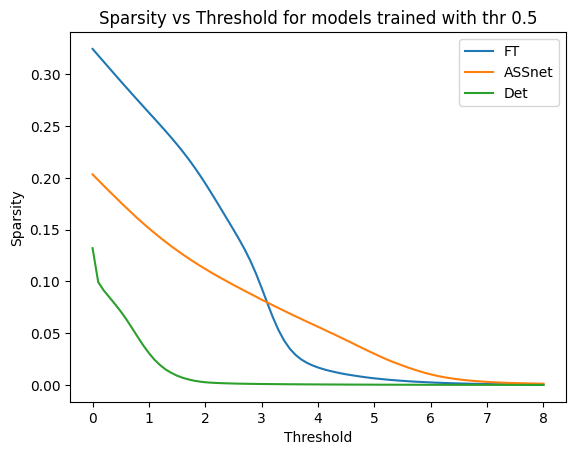

In [23]:
plt.figure()
plt.plot(v_thrs, model_1_meanspars_FT, label='FT')
plt.plot(v_thrs, model_1_meanspars_ASSnet, label='ASSnet')
plt.plot(v_thrs, model_1_meanspars_Det, label='Det')

plt.xlabel('Threshold')
plt.ylabel('Sparsity')
plt.legend()
plt.title('Sparsity vs Threshold for models trained with thr 0.5')

Text(0.5, 1.0, 'Sparsity vs Threshold for models trained with thr 1.5')

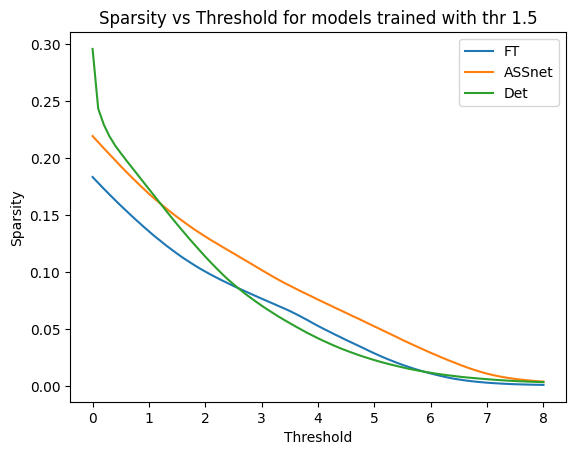

In [24]:
plt.figure()
plt.plot(v_thrs, model_2_meanspars_FT, label='FT')
plt.plot(v_thrs, model_2_meanspars_ASSnet, label='ASSnet')
plt.plot(v_thrs, model_2_meanspars_Det, label='Det')

plt.xlabel('Threshold')
plt.ylabel('Sparsity')
plt.legend()
plt.title('Sparsity vs Threshold for models trained with thr 1.5')

Text(0.5, 1.0, 'Sparsity vs Threshold for models trained with thr 4.5')

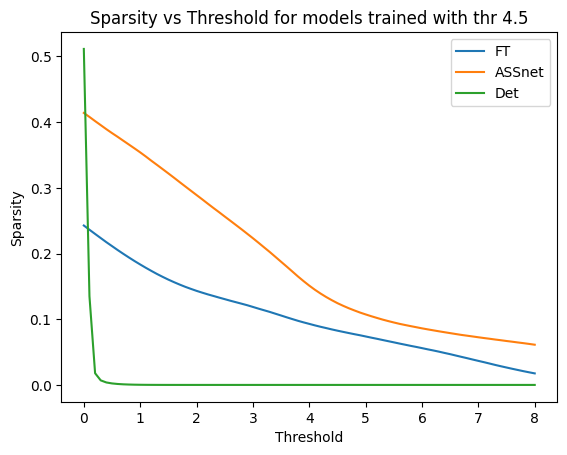

In [25]:
plt.figure()
plt.plot(v_thrs, model_3_meanspars_FT, label='FT')
plt.plot(v_thrs, model_3_meanspars_ASSnet, label='ASSnet')
plt.plot(v_thrs, model_3_meanspars_Det, label='Det')

plt.xlabel('Threshold')
plt.ylabel('Sparsity')
plt.legend()
plt.title('Sparsity vs Threshold for models trained with thr 4.5')

In [26]:
# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_DVS\Plots\Plot_data\FT_acc_vs_thr_beta0.7_num_steps60_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_FT = data['accs']
    accs2_FT = data['accs2']
    accs3_FT = data['accs3']
    briers_FT = data['briers']
    briers2_FT = data['briers2']
    briers3_FT = data['briers3']


In [27]:
# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_DVS\Plots\Plot_data\ASSnet_acc_vs_thr_beta0.7_num_steps60_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_ASSnet = data['accs']
    accs2_ASSnet = data['accs2']
    accs3_ASSnet = data['accs3']
    briers_ASSnet = data['briers']
    briers2_ASSnet = data['briers2']
    briers3_ASSnet = data['briers3']


In [28]:
# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_DVS\Plots\Plot_data\Det_acc_vs_thr_beta0.7_num_steps60_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_Det = data['accs']
    accs2_Det = data['accs2']
    accs3_Det = data['accs3']
    briers_Det = data['briers']
    briers2_Det = data['briers2']
    briers3_Det = data['briers3']


Text(0.5, 1.0, 'Accuracy vs Sparsity for models trained with thr 0.5')

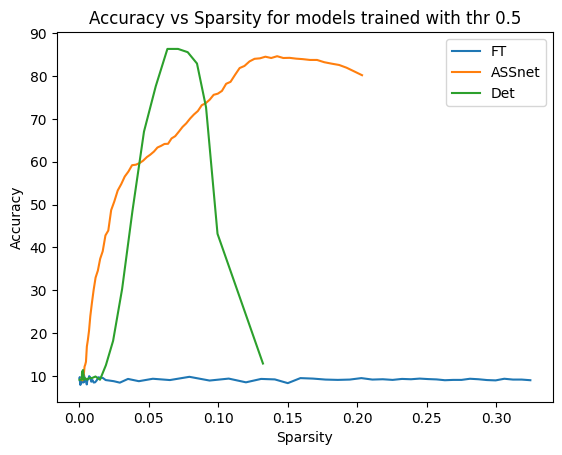

In [29]:
plt.figure()
plt.plot(model_1_meanspars_FT, accs_FT, label='FT')
plt.plot(model_1_meanspars_ASSnet, accs_ASSnet, label='ASSnet')
plt.plot(model_1_meanspars_Det, accs_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 0.5')         

Text(0.5, 1.0, 'Accuracy vs Sparsity for models trained with thr 1.5')

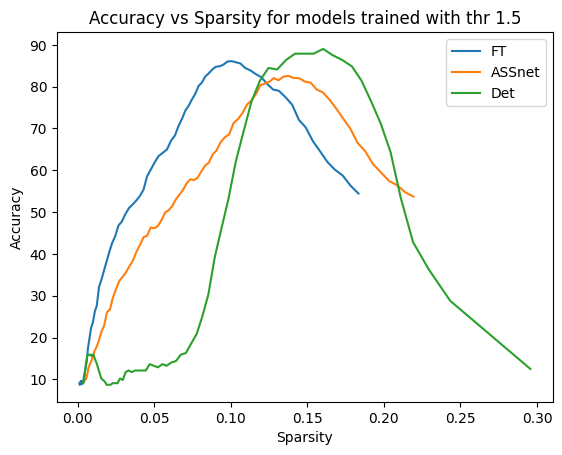

In [30]:
plt.figure()
plt.plot(model_2_meanspars_FT, accs2_FT, label='FT')
plt.plot(model_2_meanspars_ASSnet, accs2_ASSnet, label='ASSnet')
plt.plot(model_2_meanspars_Det, accs2_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 1.5')         

Text(0.5, 1.0, 'Accuracy vs Sparsity for models trained with thr 4.5')

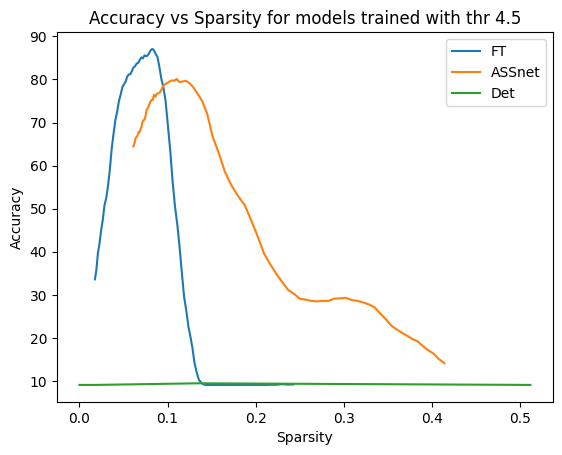

In [31]:
plt.figure()
plt.plot(model_3_meanspars_FT, accs3_FT, label='FT')
plt.plot(model_3_meanspars_ASSnet, accs3_ASSnet, label='ASSnet')
plt.plot(model_3_meanspars_Det, accs3_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 4.5')         

In [32]:
## Generate Sparsity - ACC table
## Thresholds has 98% - 95% and 90%  75%

import numpy as np

accs_FT_list = [np.array(accs_FT), np.array(accs2_FT), np.array(accs3_FT)]
spars_FT_list = [np.array(model_1_meanspars_FT), np.array(model_2_meanspars_FT), np.array(model_3_meanspars_FT)]

accs_ASSnet_list = [np.array(accs_ASSnet), np.array(accs2_ASSnet), np.array(accs3_ASSnet)]
spars_ASSnet_list = [np.array(model_1_meanspars_ASSnet), np.array(model_2_meanspars_ASSnet), np.array(model_3_meanspars_ASSnet)]

accs_Det_list = [np.array(accs_Det), np.array(accs2_Det), np.array(accs3_Det)]
spars_Det_list = [np.array(model_1_meanspars_Det), np.array(model_2_meanspars_Det), np.array(model_3_meanspars_Det)]

thresholds = [85, 80, 70]
threshtrain = [0.5, 1.5, 4.5]

for i in range(3):
    print(f'For trained threshold of {threshtrain[i]}')
    for thresh in thresholds:
        if i !=0:
            ids = np.where(accs_FT_list[i] >= thresh)
            if ids[0].shape[0] == 0:
                print(f'FT {thresh} No values above threshold')
            else: print(f'FT {thresh} Smallest spars is {np.min(spars_FT_list[i][ids])}')
        ids = np.where(accs_ASSnet_list[i] >= thresh)
        if ids[0].shape[0] == 0:
            print(f'ASSnet {thresh} No values above threshold')
        else: print(f'ASSnet {thresh} Smallest spars is {np.min(spars_ASSnet_list[i][ids])}')
        if i != 2:
            ids = np.where(accs_Det_list[i] >= thresh)
            if ids[0].shape[0] == 0:
                print(f'Det {thresh} No values above threshold')
            else: print(f'Det {thresh} Smallest spars is {np.min(spars_Det_list[i][ids])}')



For trained threshold of 0.5
ASSnet 85 No values above threshold
Det 85 Smallest spars is 0.06339901685714722
ASSnet 80 Smallest spars is 0.1121181920170784
Det 80 Smallest spars is 0.06339901685714722
ASSnet 70 Smallest spars is 0.07976435869932175
Det 70 Smallest spars is 0.05501958727836609
For trained threshold of 1.5
FT 85 Smallest spars is 0.09522239863872528
ASSnet 85 No values above threshold
Det 85 Smallest spars is 0.1360853910446167
FT 80 Smallest spars is 0.07896938174962997
ASSnet 80 Smallest spars is 0.11934908479452133
Det 80 Smallest spars is 0.11907331645488739
FT 70 Smallest spars is 0.06595680117607117
ASSnet 70 Smallest spars is 0.10181873291730881
Det 70 Smallest spars is 0.11358579248189926
For trained threshold of 4.5
FT 85 Smallest spars is 0.07023195922374725
ASSnet 85 No values above threshold
FT 80 Smallest spars is 0.05418960005044937
ASSnet 80 Smallest spars is 0.11017138510942459
FT 70 Smallest spars is 0.040705762803554535
ASSnet 70 Smallest spars is 0.07

Text(0.5, 1.0, 'Brier Score vs Sparsity for models trained with thr 4.5')

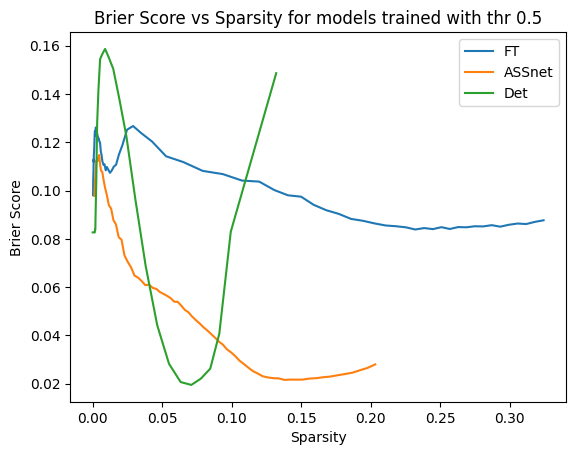

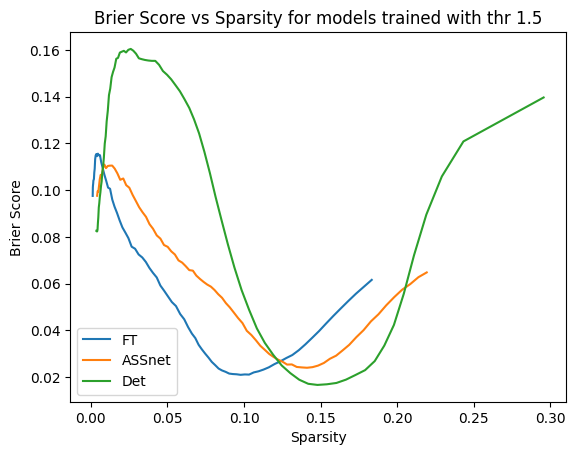

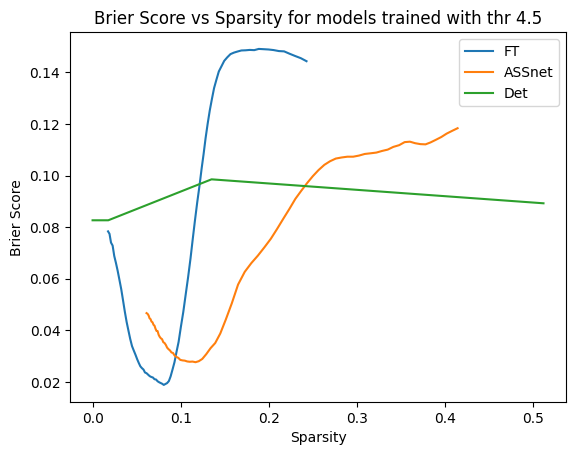

In [33]:
plt.figure()
plt.plot(model_1_meanspars_FT, briers_FT, label='FT')
plt.plot(model_1_meanspars_ASSnet, briers_ASSnet, label='ASSnet')
plt.plot(model_1_meanspars_Det, briers_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Brier Score')
plt.legend()

plt.title('Brier Score vs Sparsity for models trained with thr 0.5')         
plt.figure()
plt.plot(model_2_meanspars_FT, briers2_FT, label='FT')
plt.plot(model_2_meanspars_ASSnet, briers2_ASSnet, label='ASSnet')
plt.plot(model_2_meanspars_Det, briers2_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Brier Score')
plt.legend()

plt.title('Brier Score vs Sparsity for models trained with thr 1.5')         
plt.figure()
plt.plot(model_3_meanspars_FT, briers3_FT, label='FT')
plt.plot(model_3_meanspars_ASSnet, briers3_ASSnet, label='ASSnet')
plt.plot(model_3_meanspars_Det, briers3_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Brier Score')
plt.legend()

plt.title('Brier Score vs Sparsity for models trained with thr 4.5')         

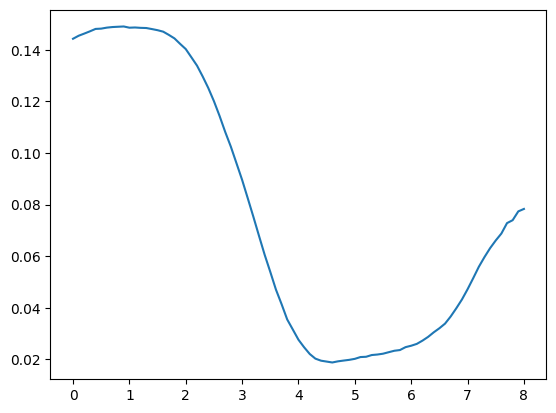

In [34]:
plt.plot(v_thrs, briers3_FT, label='Det')

In [35]:
# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_DVS\Plots\Plot_data\FT_acc_vs_thr_beta0.7_num_steps60_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_FT = data['accs']
    accs2_FT = data['accs2']
    accs3_FT = data['accs3']
    briers_FT = data['briers']
    briers2_FT = data['briers2']
    briers3_FT = data['briers3']

# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_DVS\Plots\Plot_data\ASSnet_acc_vs_thr_beta0.7_num_steps60_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_ASSnet = data['accs']
    accs2_ASSnet = data['accs2']
    accs3_ASSnet = data['accs3']
    briers_ASSnet = data['briers']
    briers2_ASSnet = data['briers2']
    briers3_ASSnet = data['briers3']

# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_DVS\Plots\Plot_data\Det_acc_vs_thr_beta0.7_num_steps60_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_Det = data['accs']
    accs2_Det = data['accs2']
    accs3_Det = data['accs3']
    briers_Det = data['briers']
    briers2_Det = data['briers2']
    briers3_Det = data['briers3']


Text(0.5, 1.0, 'Accuracy vs Sparsity for models trained with thr 4.5')

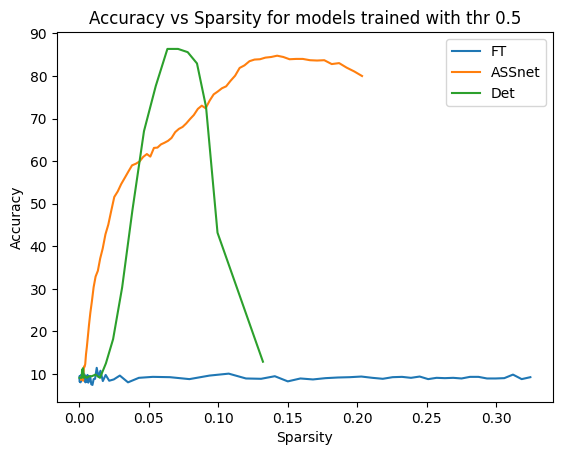

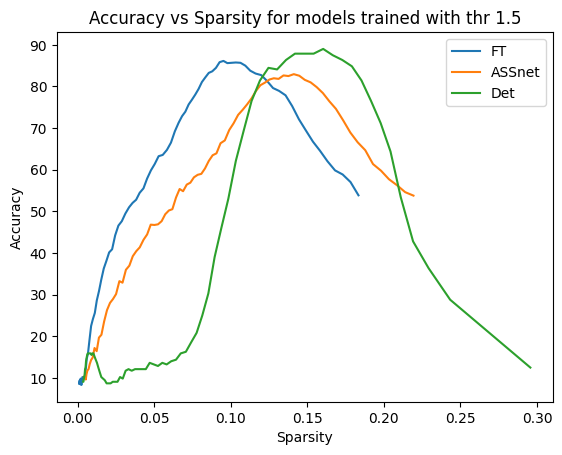

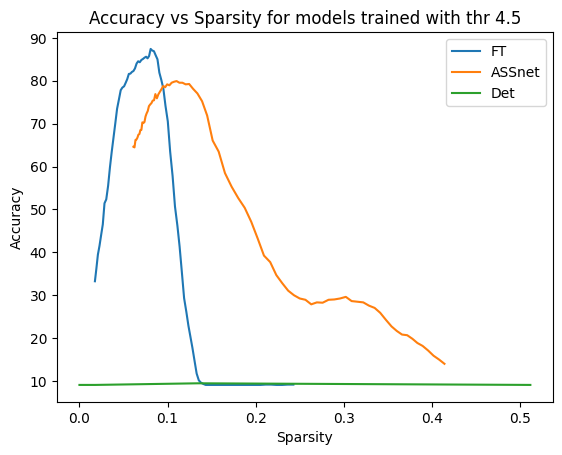

In [36]:
plt.figure()
plt.plot(model_1_meanspars_FT, accs_FT, label='FT')
plt.plot(model_1_meanspars_ASSnet, accs_ASSnet, label='ASSnet')
plt.plot(model_1_meanspars_Det, accs_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 0.5')         
plt.figure()
plt.plot(model_2_meanspars_FT, accs2_FT, label='FT')
plt.plot(model_2_meanspars_ASSnet, accs2_ASSnet, label='ASSnet')
plt.plot(model_2_meanspars_Det, accs2_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 1.5')         
plt.figure()
plt.plot(model_3_meanspars_FT, accs3_FT, label='FT')
plt.plot(model_3_meanspars_ASSnet, accs3_ASSnet, label='ASSnet')
plt.plot(model_3_meanspars_Det, accs3_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 4.5')         